<h1>What are the most demand skills for the top 3 most popular data role</h1>

### Methodology:
    .clean-up skill column
    .calculate skill count based on job_title_short column
    .calculate the skill percentage
    .and finally plot your finding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
#Loading Data
dx = load_dataset('lukebarousse/data_jobs')
dataFrame = dx['train'].to_pandas()
#Clean Up Data
dataFrame["job_posted_date"] = pd.to_datetime(dataFrame["job_posted_date"])
dataFrame["job_skills"] = dataFrame["job_skills"].apply(lambda skill_job: ast.literal_eval(skill_job) if pd.notna(skill_job) else [])

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\USER\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Feb  6 02:20:56 2025).


In [2]:
DF_Nigeria = dataFrame[dataFrame["job_country"] == "Nigeria"]
df_skill = DF_Nigeria.explode("job_skills")
df_skill_count = df_skill.groupby(["job_skills", "job_title_short"]).size()
df_skill_count = df_skill_count.reset_index(name="skill_count")
df_skill_count.sort_values(by="skill_count", ascending=False, inplace=True)
job_titles = df_skill_count["job_title_short"].unique().tolist()
job_titles = job_titles[:3]

### This Area is for testing:
##### Therefore disregard any information here

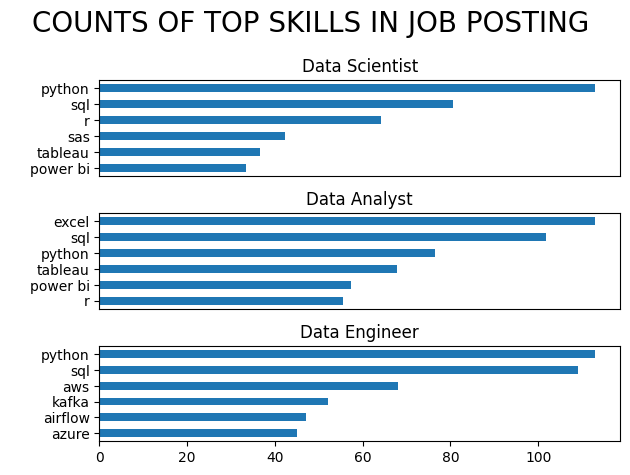

In [3]:
fig,axi = plt.subplots(len(job_titles), 1)
for index,job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count["job_title_short"] == job_title].head(6)
    df_plot.plot(kind="barh",x="job_skills",y="skill_count",ax=axi[index],title=job_title)
    axi[index].invert_yaxis()
    axi[index].set_ylabel(" ")
    axi[index].legend().set_visible(False)
    if index != len(job_titles)-1:
        axi[index].set_xticks([ ])
fig.suptitle("Counts of top skills in job posting ".upper(), fontsize=20)
fig.tight_layout()

### Final Plot

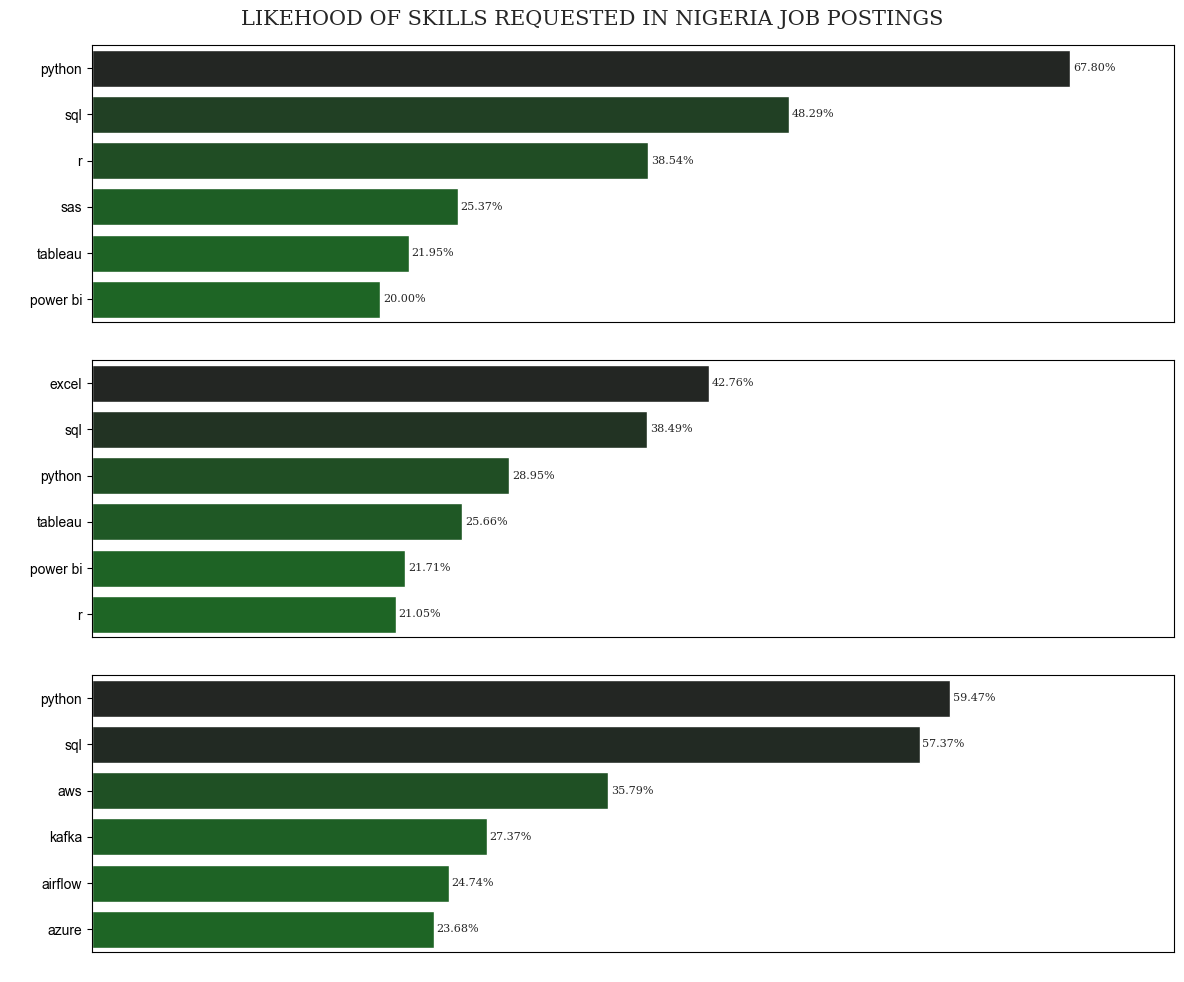

In [4]:
df_job_total = DF_Nigeria["job_title_short"].value_counts().reset_index(name="job_total_count")
df_percent = pd.merge(df_skill_count, df_job_total, on="job_title_short")
df_percent["skill_percent"] = (df_percent["skill_count"]/df_percent["job_total_count"])*100


#Plot our graph
fig,axi = plt.subplots(len(job_titles), 1, figsize=(12,10))
sns.set_theme(style="whitegrid", palette="dark", font="serif", font_scale=1)
for index,job_title in enumerate(job_titles):
    df_plot = df_percent[df_percent["job_title_short"] == job_title].head(6)
    sns.barplot(data=df_plot, y="job_skills", x="skill_percent", hue="skill_count", ax=axi[index],palette="dark:g_r")
    axi[index].set_ylabel(" ")
    axi[index].legend().set_visible(False)
    axi[index].set_xlabel(" ")
    axi[index].set_xlim(0, 75)
    for i, val in enumerate(df_plot["skill_percent"]):
        axi[index].text(val + 0.2, i, f"{val:,.2f}%", va="center", fontsize=8)
    axi[index].set_xticks([ ])
fig.suptitle("Likehood of skills requested in Nigeria job postings".upper(), fontsize=15)
fig.tight_layout()
plt.show()